# Notebook for generating figures for the paper

Inputs:
* 250217_Arivale_Indiv.csv  
* 250217_Arivale_Indiv_delage.csv   
* 250217_TwinsUK_Indiv.csv  
* Arivale_preprocessed_interaction_analysis.csv  
* E1199_15122022_2_TwinsUK_Interaction_Analysis.csv  
  
Outputs:  
* All figures (exception, Fig 1, Fig 3d-e)
  
'Save' lines are commented out  

# Import Packages

In [1]:
import pandas as pd
from IPython.display import display
# get the library
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

# Figure 1

In [2]:
# Figure 1, the graphical abstract, was made in ppt

# Figure 2

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
apoe_regress = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/250217_Arivale_Indiv.csv')

Text(0, 0.5, '-log10 p-value')

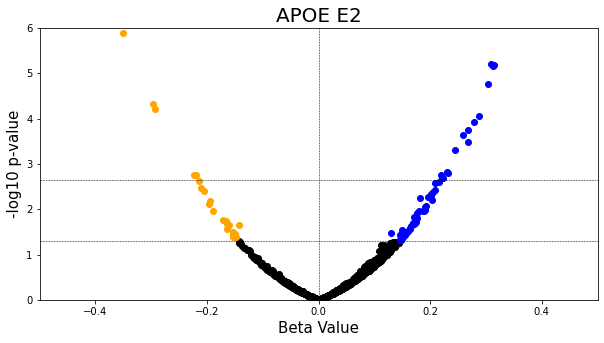

In [5]:
#e2
fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 6

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.00223)),(-math.log10(0.00223))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'black')
plt.scatter(x=x2, y=y2, color = 'blue')
plt.scatter(x=x3, y=y3, color = 'orange')

plt.title('APOE E2',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')

# fig.savefig('250219_Fig2_E2.png', bbox_inches='tight')

Text(0, 0.5, '-log10 p-value')

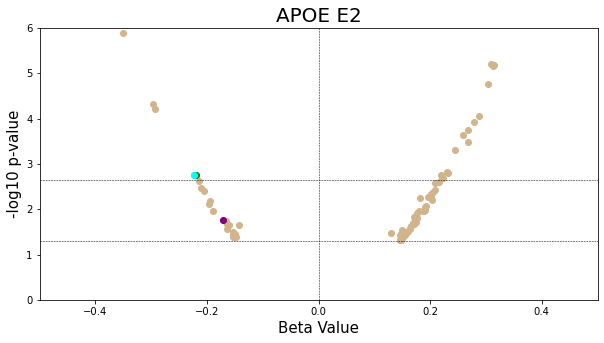

In [6]:
# figure script for identifying specific analytes to label offline
analyte_name = "cholesterol"
analyte_name2 = "palmitoyl sphingomyelin (d18:1/16:0)"
analyte_name3 = "palmitoyl dihydrosphingomyelin (d18:0/16:0)*"

fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x4 = apoe_regress[(apoe_regress['col1'] == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y4 = apoe_regress[(apoe_regress['col1'] == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x5 = apoe_regress[(apoe_regress['col1'] == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y5 = apoe_regress[(apoe_regress['col1'] == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x6 = apoe_regress[(apoe_regress['col1'] == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y6 = apoe_regress[(apoe_regress['col1'] == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 6

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.00223)),(-math.log10(0.00223))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'white')
plt.scatter(x=x2, y=y2, color = 'tan')
plt.scatter(x=x3, y=y3, color = 'tan')
plt.scatter(x=x4, y=y4, color = 'purple')
plt.scatter(x=x5, y=y5, color = 'green')
plt.scatter(x=x6, y=y6, color = 'cyan')


plt.title('APOE E2',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')


Text(0, 0.5, '-log10 p-value')

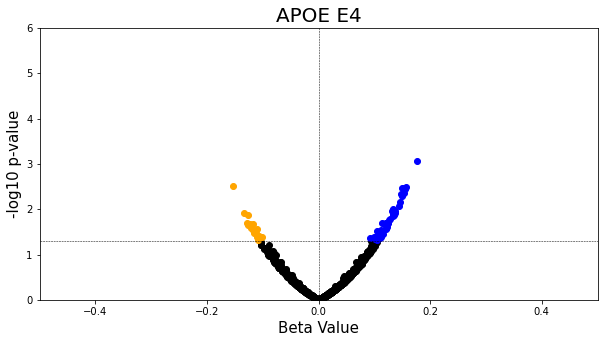

In [7]:
#e4
fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 6

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'black')
plt.scatter(x=x2, y=y2, color = 'blue')
plt.scatter(x=x3, y=y3, color = 'orange')

plt.title('APOE E4',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')

# fig.savefig('250219_Fig2_E4.png', bbox_inches='tight')

Text(0, 0.5, '-log10 p-value')

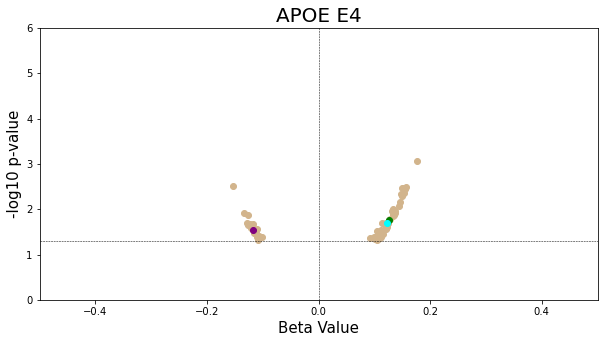

In [8]:
# figure script for identifying specific analytes to label offline
analyte_name = '2-hydroxybutyrate/2-hydroxyisobutyrate'
analyte_name2 = '2,3-dihydroxyisovalerate'
analyte_name3 = 'aconitate [cis or trans]'

#e4
fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x4 = apoe_regress[(apoe_regress['col1'] == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y4 = apoe_regress[(apoe_regress['col1'] == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x5 = apoe_regress[(apoe_regress['col1'] == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y5 = apoe_regress[(apoe_regress['col1'] == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x6 = apoe_regress[(apoe_regress['col1'] == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y6 = apoe_regress[(apoe_regress['col1'] == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))




yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 6

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'white')
plt.scatter(x=x2, y=y2, color = 'tan')
plt.scatter(x=x3, y=y3, color = 'tan')
plt.scatter(x=x4, y=y4, color = 'purple')
plt.scatter(x=x5, y=y5, color = 'green')
plt.scatter(x=x6, y=y6, color = 'cyan')

plt.title('APOE E4',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')


In [9]:
health_regress = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/250217_Arivale_Indiv_delage.csv')

Text(0, 0.5, '-log10 p-value')

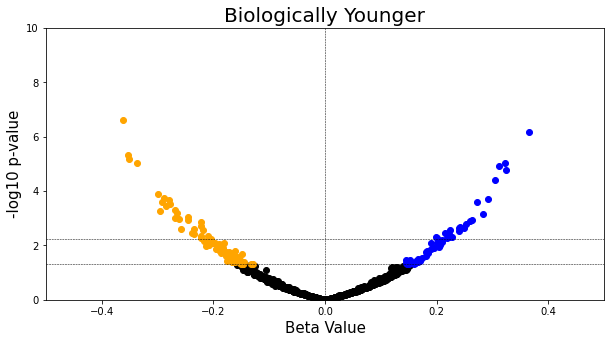

In [10]:
#Health
fig, ax = plt.subplots(figsize=(10, 5))


x = health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y = health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))



yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 10

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.0056)),(-math.log10(0.0056))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'black')
plt.scatter(x=x2, y=y2, color = 'blue')
plt.scatter(x=x3, y=y3, color = 'orange')

plt.title('Biologically Younger',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')

# fig.savefig('250219_Fig2_Bio_Young.png', bbox_inches='tight')

Text(0, 0.5, '-log10 p-value')

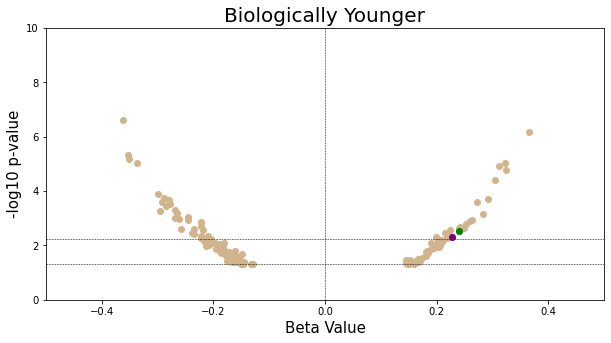

In [11]:
# figure script for identifying specific analytes to label offline
analyte_name = 'serotonin'
analyte_name2 = '1-stearoyl-2-oleoyl-GPS (18:0/18:1)'
analyte_name3 = 'x'

#Health
fig, ax = plt.subplots(figsize=(10, 5))


x = health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y = health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x4 = health_regress[(health_regress['col1']==analyte_name)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y4 = health_regress[(health_regress['col1']==analyte_name)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x5 = health_regress[(health_regress['col1']==analyte_name2)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y5 = health_regress[(health_regress['col1']==analyte_name2)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))

x6 = health_regress[(health_regress['col1']==analyte_name3)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]']
y6 = health_regress[(health_regress['col1']==analyte_name3)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Healthy]_p'].apply(lambda x: -math.log10(x))


yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 10

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.0056)),(-math.log10(0.0056))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'white')
plt.scatter(x=x2, y=y2, color = 'tan')
plt.scatter(x=x3, y=y3, color = 'tan')
plt.scatter(x=x4, y=y4, color = 'purple')
plt.scatter(x=x5, y=y5, color = 'green')
plt.scatter(x=x6, y=y6, color = 'cyan')

plt.title('Biologically Younger',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')


Text(0, 0.5, '-log10 p-value')

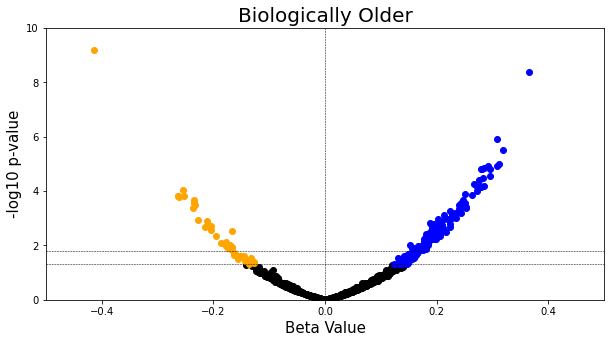

In [12]:

fig, ax = plt.subplots(figsize=(10, 5))

x1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))

x2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))

x3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))


yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 10

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.0156)),(-math.log10(0.0156))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'black')
plt.scatter(x=x2, y=y2, color = 'blue')
plt.scatter(x=x3, y=y3, color = 'orange')

plt.title('Biologically Older',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')

# fig.savefig('250219_Fig2_Bio_Old.png', bbox_inches='tight')

Text(0, 0.5, '-log10 p-value')

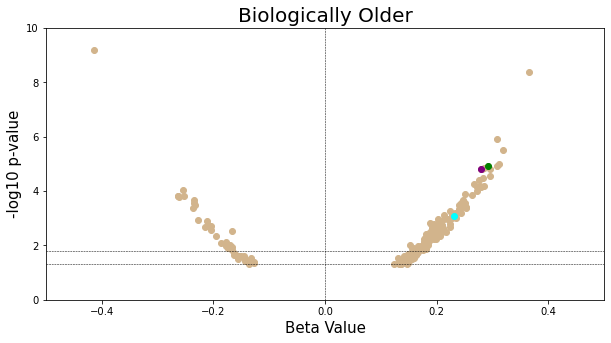

In [13]:
# figure script for identifying specific analytes to label offline
analyte_name = '1-methylhistidine'
analyte_name2 = 'X - 13835'
analyte_name3 = 'N1-Methyl-2-pyridone-5-carboxamide'

#Health
fig, ax = plt.subplots(figsize=(10, 5))

x1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y1 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']>=0.05)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))

x2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y2 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']>0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))

x3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y3 = health_regress[(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p']<0.05)&(health_regress['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']<0)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))

x4 = health_regress[(health_regress['col1']==analyte_name)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y4 = health_regress[(health_regress['col1']==analyte_name)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))

x5 = health_regress[(health_regress['col1']==analyte_name2)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y5 = health_regress[(health_regress['col1']==analyte_name2)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))

x6 = health_regress[(health_regress['col1']==analyte_name3)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]']
y6 = health_regress[(health_regress['col1']==analyte_name3)]['C(Model_Health_Indiv, Treatment(reference=1))[T.Unhealthy]_p'].apply(lambda x: -math.log10(x))


yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 10

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.0156)),(-math.log10(0.0156))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'white')
plt.scatter(x=x2, y=y2, color = 'tan')
plt.scatter(x=x3, y=y3, color = 'tan')
plt.scatter(x=x4, y=y4, color = 'purple')
plt.scatter(x=x5, y=y5, color = 'green')
plt.scatter(x=x6, y=y6, color = 'cyan')

plt.title('Biologically Older',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')


In [14]:
# labels of points of interest and putting the four figures together was done offline in ppt

# Figure 3

In [15]:
df_5SD_winsor_arivale = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/Arivale_preprocessed_interaction_analysis.csv')

In [16]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [17]:
###### rename delta age groups
df_5SD_winsor_arivale['Delta Age Status'] = 'Not_Filled_Yet'
for i in df_5SD_winsor_arivale.index:
    if df_5SD_winsor_arivale.Model_Health[i] == "Unhealthy":
        df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Old'
    elif df_5SD_winsor_arivale.Model_Health[i] == "Healthy":
        df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Young'
    elif df_5SD_winsor_arivale.Model_Health[i] == "Norm":
        df_5SD_winsor_arivale['Delta Age Status'][i] = 'BA ~ CA'

/tmp/ipykernel_2712081/1680621317.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5SD_winsor_arivale['Delta Age Status'][i] = 'BA ~ CA'
/tmp/ipykernel_2712081/1680621317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Old'
/tmp/ipykernel_2712081/1680621317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Young'


In [18]:
def grab_alleles(df_with_apoe):
    df_with_apoe['e2_allele'] = 999
    df_with_apoe['e4_allele'] = 999
    for i in df_with_apoe.index:
        if df_with_apoe.APOE_Genotype[i] == 'E2/E2':
            df_with_apoe.e2_allele[i] = 2
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E2/E3':
            df_with_apoe.e2_allele[i] = 1
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E2/E4':
            df_with_apoe.e2_allele[i] = 1
            df_with_apoe.e4_allele[i] = 1
        if df_with_apoe.APOE_Genotype[i] == 'E3/E3':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E3/E4':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 1
        if df_with_apoe.APOE_Genotype[i] == 'E4/E4':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 2
    return df_with_apoe

In [19]:
df_5SD_winsor_arivale = grab_alleles(df_5SD_winsor_arivale)

/tmp/ipykernel_2712081/3204699222.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e2_allele[i] = 0
/tmp/ipykernel_2712081/3204699222.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e4_allele[i] = 1
/tmp/ipykernel_2712081/3204699222.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e2_allele[i] = 0
/tmp/ipykernel_2712081/3204699222.py:16: SettingWithCopyWarning: 
A value is trying to b

In [20]:
#a

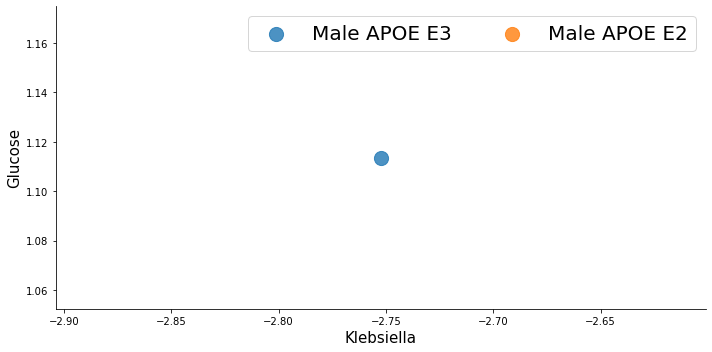

In [21]:
# use this to get the legend to use for the group of figs
ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.APOE_Status == 'E2')|(df_5SD_winsor_arivale.APOE_Status == 'E3'))&(df_5SD_winsor_arivale.sex == 'M')].head(n=5),
                x='Klebsiella',y='572',hue='APOE_Status',hue_order = ['E3','E2'], legend=False, height = 5, aspect = 2, palette = 'tab10', scatter_kws={"s": 200})

# plt.xlabel('Pyruvate')
plt.ylabel('Glucose')
# plt.legend(title='Male \n APOE Status', title_fontsize = 15, loc='upper right')
plt.legend(ncol = 2, labels = ['Male APOE E3', 'Male APOE E2'], fontsize = 20, loc='upper right')
           
# plt.savefig('240721_ME2_legend.png', bbox_inches='tight')

Text(25.800000000000004, 0.5, 'Glucose')

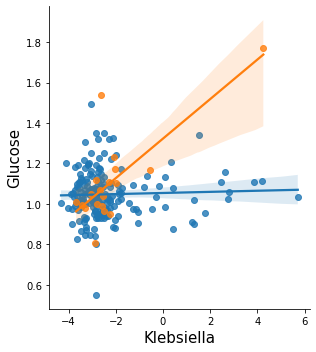

In [22]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.APOE_Status == 'E2')|(df_5SD_winsor_arivale.APOE_Status == 'E3'))&(df_5SD_winsor_arivale.sex == 'M')],
                x='Klebsiella',y='572',hue='APOE_Status',hue_order = ['E3','E2'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('Klebsiella')
plt.ylabel('Glucose')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_ME2_1of3.png', bbox_inches='tight')

Text(25.800000000000004, 0.5, 'Hemoglobin A1c')

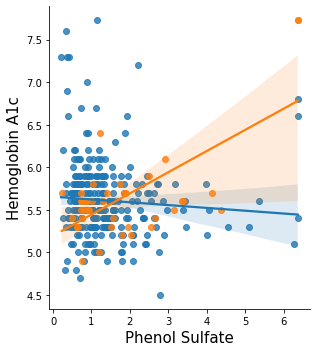

In [23]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.APOE_Status == 'E2')|(df_5SD_winsor_arivale.APOE_Status == 'E3'))&(df_5SD_winsor_arivale.sex == 'M')],
                x='100001510',y='GLYCOHEMOGLOBIN A1C',hue='APOE_Status',hue_order = ['E3','E2'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('Phenol Sulfate')
plt.ylabel('Hemoglobin A1c')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_ME2_2of3.png', bbox_inches='tight')

Text(22.675000000000004, 0.5, 'Triglycerides')

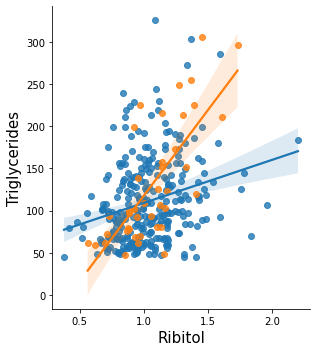

In [24]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.APOE_Status == 'E2')|(df_5SD_winsor_arivale.APOE_Status == 'E3'))&(df_5SD_winsor_arivale.sex == 'M')],
                x='100000406',y='TRIGLYCERIDES',hue='APOE_Status',hue_order = ['E3','E2'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('Ribitol')
plt.ylabel('Triglycerides')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_ME2_3of3.png', bbox_inches='tight')

In [25]:
#b

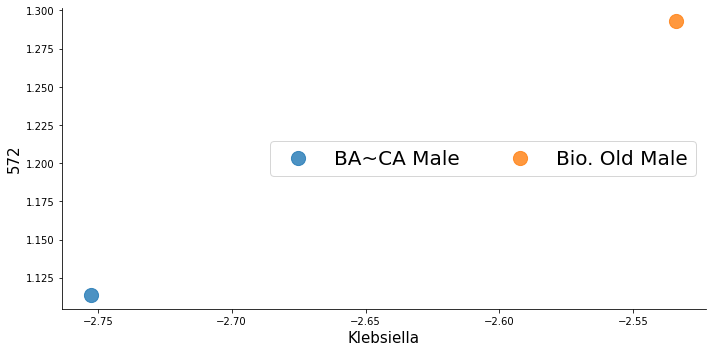

In [26]:
# use this to get the legend
ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'M')].head(n=5),
                x='Klebsiella',y='572',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 2, palette = 'tab10', scatter_kws={"s": 200})


plt.legend(ncol = 2, labels = ['BA~CA Male', 'Bio. Old Male'], fontsize = 20, loc='center right')
           
# plt.savefig('240721_MBioOld_legend.png', bbox_inches='tight')

Text(25.800000000000004, 0.5, 'Hemoglobin A1c')

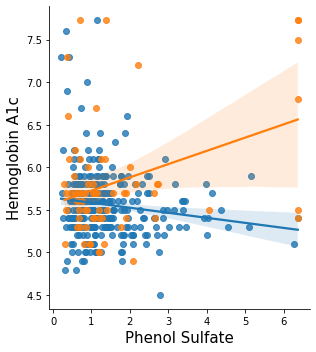

In [27]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'M')],
                x='100001510',y='GLYCOHEMOGLOBIN A1C',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('Phenol Sulfate')
plt.ylabel('Hemoglobin A1c')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_MBioOld_1of3.png', bbox_inches='tight')

Text(25.800000000000004, 0.5, 'Hemoglobin A1c')

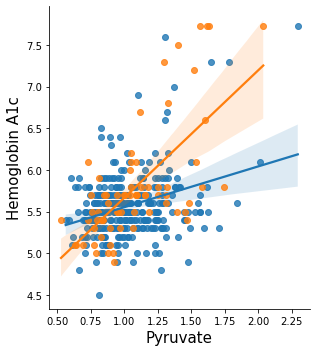

In [28]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'M')],
                x='823',y='GLYCOHEMOGLOBIN A1C',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('Pyruvate')
plt.ylabel('Hemoglobin A1c')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_MBioOld_2of3.png', bbox_inches='tight')

Text(22.675000000000004, 0.5, 'Glucose')

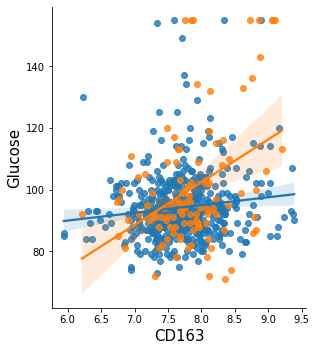

In [29]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'M')],
                x='CVD3_Q86VB7',y='GLUCOSE',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('CD163')
plt.ylabel('Glucose')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_MBioOld_3of3.png', bbox_inches='tight')

In [30]:
#c

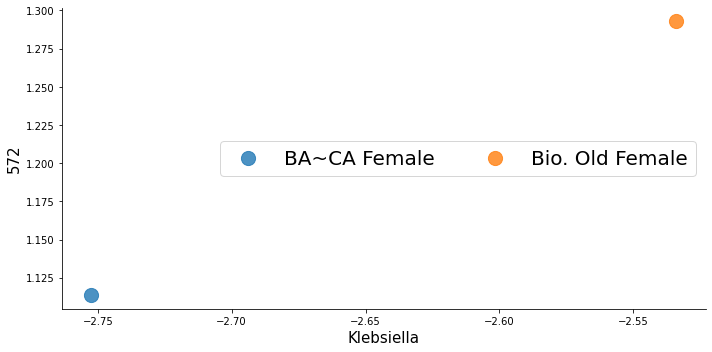

In [31]:
# use this to get the legend to use for the group of figs
ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'M')].head(n=5),
                x='Klebsiella',y='572',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 2, palette = 'tab10', scatter_kws={"s": 200})


plt.legend(ncol = 2, labels = ['BA~CA Female', 'Bio. Old Female'], fontsize = 20, loc='center right')
           
# plt.savefig('240721_FBioOld_legend.png', bbox_inches='tight')

Text(22.675000000000004, 0.5, 'Glucose')

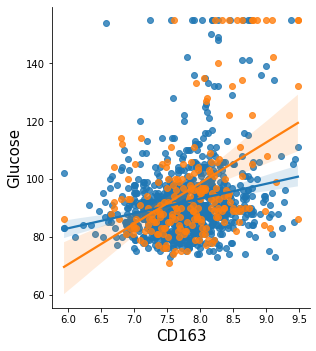

In [32]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'F')],
                x='CVD3_Q86VB7',y='GLUCOSE',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('CD163')
plt.ylabel('Glucose')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_FBioOld_1of3.png', bbox_inches='tight')

Text(35.425000000000004, 0.5, 'Hemoglobin A1c')

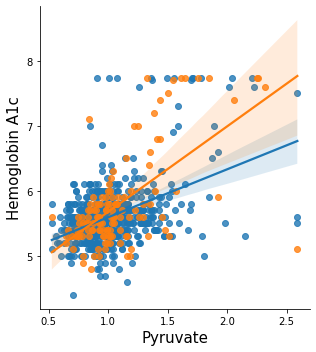

In [33]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'F')],
                x='823',y='GLYCOHEMOGLOBIN A1C',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('Pyruvate')
plt.ylabel('Hemoglobin A1c')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_FBioOld_2of3.png', bbox_inches='tight')

Text(25.800000000000004, 0.5, 'Hemoglobin A1c')

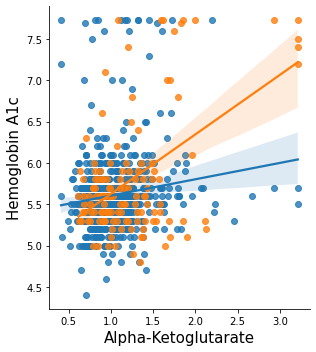

In [34]:

ax = sns.lmplot(data=df_5SD_winsor_arivale[((df_5SD_winsor_arivale.Model_Health == 'Unhealthy')|(df_5SD_winsor_arivale.Model_Health == 'Norm'))&(df_5SD_winsor_arivale.sex == 'F')],
                x='93',y='GLYCOHEMOGLOBIN A1C',hue='Model_Health',hue_order = ['Norm','Unhealthy'], legend=False, height = 5, aspect = 0.9, palette = 'tab10')

plt.xlabel('Alpha-Ketoglutarate')
plt.ylabel('Hemoglobin A1c')
# plt.legend(title='Delta Age Group',loc='upper left')
           
# plt.savefig('240721_FBioOld_3of3.png', bbox_inches='tight')

In [35]:
# circos plots in 3d and 3e made with Code08, combined in ppt

# Figure 4

In [36]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [37]:
apoe_regress = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/250217_TwinsUK_Indiv.csv')

Text(0, 0.5, '-log10 p-value')

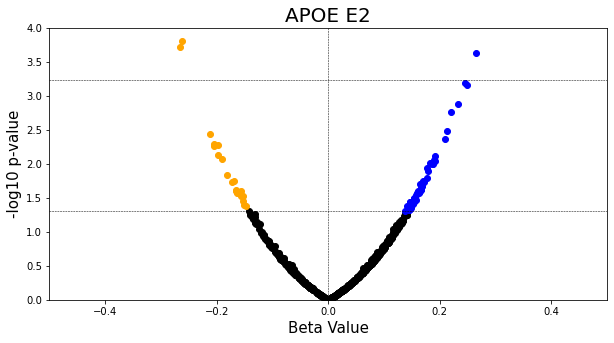

In [38]:
#e2
fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 4

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.00059)),(-math.log10(0.00059))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)


plt.scatter(x=x1, y=y1, color = 'black')
plt.scatter(x=x2, y=y2, color = 'blue')
plt.scatter(x=x3, y=y3, color = 'orange')

plt.title('APOE E2',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')

# fig.savefig('250219_Fig4_E2.png', bbox_inches='tight')

Text(0, 0.5, '-log10 p-value')

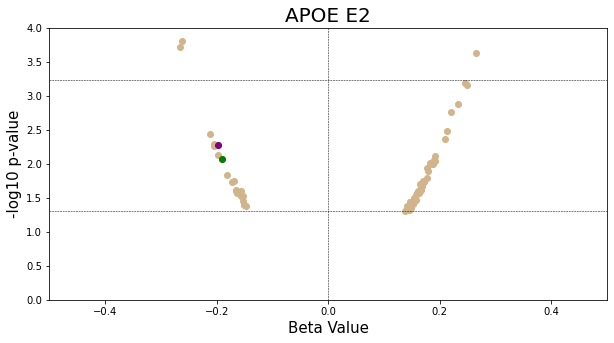

In [39]:
# figure script for identifying specific analytes to label offline
analyte_name =  "palmitoyl sphingomyelin (d18:1/16:0)"
analyte_name2 = "tryptophan betaine"
analyte_name3 = "x"

#e2
fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E2]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x4 = apoe_regress[(apoe_regress.col1 == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y4 = apoe_regress[(apoe_regress.col1 == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x5 = apoe_regress[(apoe_regress.col1 == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y5 = apoe_regress[(apoe_regress.col1 == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))

x6 = apoe_regress[(apoe_regress.col1 == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E2]']
y6 = apoe_regress[(apoe_regress.col1 == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E2]_p'].apply(lambda x: -math.log10(x))


yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 4

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

yh2 = [(-math.log10(0.00059)),(-math.log10(0.00059))]
ax.plot([-xh,xh], yh2,color='black',linestyle='dashed',linewidth=0.5)


plt.scatter(x=x1, y=y1, color = 'white')
plt.scatter(x=x2, y=y2, color = 'tan')
plt.scatter(x=x3, y=y3, color = 'tan')
plt.scatter(x=x4, y=y4, color = 'purple')
plt.scatter(x=x5, y=y5, color = 'green')
plt.scatter(x=x6, y=y6, color = 'cyan')

plt.title('APOE E2',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')


Text(0, 0.5, '-log10 p-value')

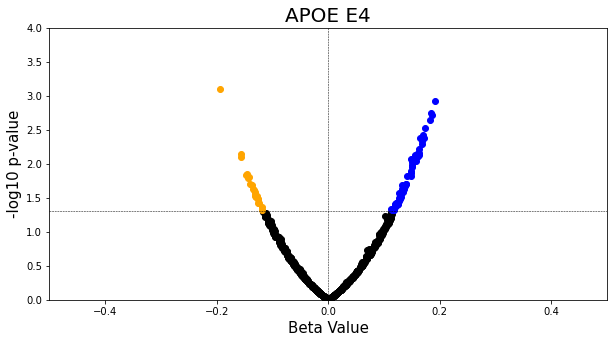

In [40]:
#e4
fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 4

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'black')
plt.scatter(x=x2, y=y2, color = 'blue')
plt.scatter(x=x3, y=y3, color = 'orange')

plt.title('APOE E4',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')

# fig.savefig('250219_Fig4_E4.png', bbox_inches='tight')

Text(0, 0.5, '-log10 p-value')

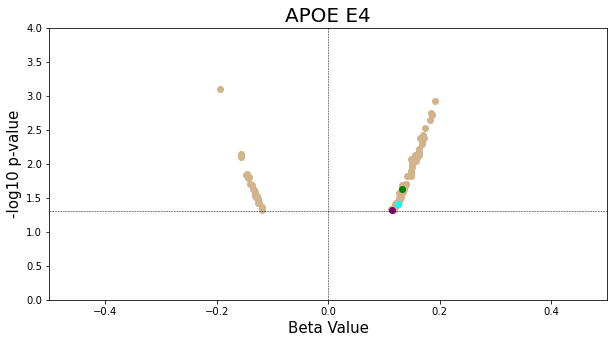

In [41]:
# figure script for identifying specific analytes to label offline
analyte_name =  "palmitoyl sphingomyelin (d18:1/16:0)"
analyte_name2 = "oleoyl-linoleoyl-glycerol (18:1/18:2) [2]"
analyte_name3 = "taurochenodeoxycholate"

fig, ax = plt.subplots(figsize=(10, 5))

x1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y1 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']>=0.05)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y2 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']>0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y3 = apoe_regress[(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]_p']<0.05)&(apoe_regress['C(APOE_Status, Treatment(reference=1))[T.E4]']<0)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x4 = apoe_regress[(apoe_regress.col1 == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y4 = apoe_regress[(apoe_regress.col1 == analyte_name)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x5 = apoe_regress[(apoe_regress.col1 == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y5 = apoe_regress[(apoe_regress.col1 == analyte_name2)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))

x6 = apoe_regress[(apoe_regress.col1 == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E4]']
y6 = apoe_regress[(apoe_regress.col1 == analyte_name3)]['C(APOE_Status, Treatment(reference=1))[T.E4]_p'].apply(lambda x: -math.log10(x))


yh = [(-math.log10(0.05)),(-math.log10(0.05))]
# yh = [(-math.log10(0.05/996)),(-math.log10(0.05/996))]
xh = 0.5
yv = 4

ax.set_xlim([-xh,xh])
ax.set_ylim([0,yv])

ax.plot([-xh,xh], yh,color='black',linestyle='dashed',linewidth=0.5)
ax.plot([0,0], [0,yv],color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv, yv,color='black',linestyle='dashed',linewidth=0.5)
# ax.plot(xv2, yv,color='black',linestyle='dashed',linewidth=0.5)

plt.scatter(x=x1, y=y1, color = 'white')
plt.scatter(x=x2, y=y2, color = 'tan')
plt.scatter(x=x3, y=y3, color = 'tan')
plt.scatter(x=x4, y=y4, color = 'purple')
plt.scatter(x=x5, y=y5, color = 'green')
plt.scatter(x=x6, y=y6, color = 'cyan')

plt.title('APOE E4',fontsize = BIGGER_SIZE)
plt.xlabel('Beta Value')
plt.ylabel('-log10 p-value')


---

# Figure S1

In [42]:
df_with_apoe = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/Arivale_preprocessed_interaction_analysis.csv')

In [43]:
len(df_with_apoe)

2229

In [44]:
df_with_apoe[(df_with_apoe.sex=='M')].race.value_counts()/len(df_with_apoe[(df_with_apoe.sex=='M')])

white                                0.659806
south asian                          0.062954
hispanic latino or spanish origin    0.052058
unknown                              0.052058
east asian                           0.044794
asian                                0.041162
ashkenazi jewish                     0.037530
other                                0.029056
black or african-american            0.020581
Name: race, dtype: float64

In [45]:
df_with_apoe[(df_with_apoe.sex=='M')].age.mean()

44.460048426150124

In [46]:
(len(df_with_apoe[(df_with_apoe.APOE_Status == 'E4')])+len(df_with_apoe[(df_with_apoe.APOE_Genotype == 'E2/E4')]))/len(df_with_apoe)

0.24719605204127412

In [47]:
(len(df_with_apoe[(df_with_apoe.APOE_Status == 'E2')])+len(df_with_apoe[(df_with_apoe.APOE_Genotype == 'E2/E4')]))/len(df_with_apoe)

0.126514131897712

In [48]:
df_with_apoe[(df_with_apoe.sex=='F')&(df_with_apoe.APOE_Genotype!='Not Filled Yet')].APOE_Genotype.value_counts()/len(df_with_apoe[(df_with_apoe.sex=='F')&(df_with_apoe.APOE_Genotype!='Not Filled Yet')])

E3/E3    0.637598
E3/E4    0.211580
E2/E3    0.108649
E2/E4    0.021444
E4/E4    0.016440
E2/E2    0.004289
Name: APOE_Genotype, dtype: float64

In [49]:
df_with_apoe[(df_with_apoe.sex=='M')&(df_with_apoe.APOE_Genotype!='Not Filled Yet')].APOE_Genotype.value_counts()/len(df_with_apoe[(df_with_apoe.sex=='M')&(df_with_apoe.APOE_Genotype!='Not Filled Yet')])

E3/E3    0.653333
E3/E4    0.214545
E2/E3    0.094545
E4/E4    0.018182
E2/E4    0.012121
E2/E2    0.007273
Name: APOE_Genotype, dtype: float64

In [50]:
df_with_apoe[(df_with_apoe.sex=='F')&(df_with_apoe.APOE_Genotype!='Not Filled Yet')].APOE_Genotype.value_counts()

E3/E3    892
E3/E4    296
E2/E3    152
E2/E4     30
E4/E4     23
E2/E2      6
Name: APOE_Genotype, dtype: int64

In [51]:
df_with_apoe[(df_with_apoe.sex=='M')&(df_with_apoe.APOE_Genotype!='Not Filled Yet')].APOE_Genotype.value_counts()

E3/E3    539
E3/E4    177
E2/E3     78
E4/E4     15
E2/E4     10
E2/E2      6
Name: APOE_Genotype, dtype: int64

In [52]:
d = {'F_percent': [6,152,30,892,296,23], 
     'M_percent': [6,78,10,539,177,15], 
     }

i = ['E2/E2', 'E2/E3', 'E2/E4', 'E3/E3', 'E3/E4', 'E4/E4']
summary_df = pd.DataFrame(data=d, index=i)


In [53]:
print(len(df_with_apoe[df_with_apoe.sex == 'F']),len(df_with_apoe[df_with_apoe.sex == 'M']))

1403 826


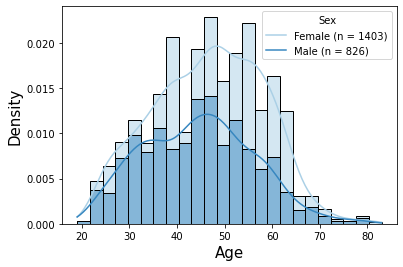

In [54]:
anotherplot = sns.histplot(data=df_with_apoe, x="age", hue="sex", hue_order = ['M','F'], kde = True, palette = 'Blues_r', stat = 'density')
plt.xlabel('Age')
plt.legend(['Female (n = 1403)', 'Male (n = 826)'], title = 'Sex')
# plt.savefig('S1_a.png', bbox_inches='tight')

No handles with labels found to put in legend.


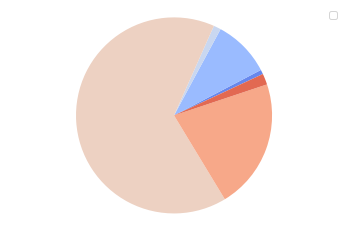

In [55]:
# MALE
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sns.set_palette('coolwarm')
labels = 'E2/E2', 'E2/E3', 'E2/E4', 'E3/E3', 'E3/E4', 'E4/E4'
sizes = summary_df.M_percent[0:6]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, startangle=25) #25
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

plt.show()
fig = ax1.get_figure()
# fig.savefig('S1_b_m.png')

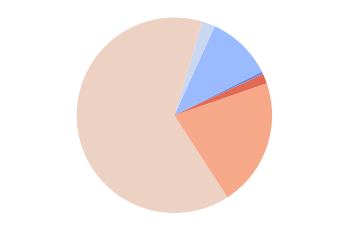

In [56]:
# FEMALE
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# sns.set_palette('Blues')
sns.set_palette('coolwarm')
labels = 'E2/E2', 'E2/E3', 'E2/E4', 'E3/E3', 'E3/E4', 'E4/E4'
sizes = summary_df.F_percent[0:6]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=None, startangle=25)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.legend(labels=labels)

plt.show()
fig = ax1.get_figure()
# fig.savefig('S1_b_f.png')

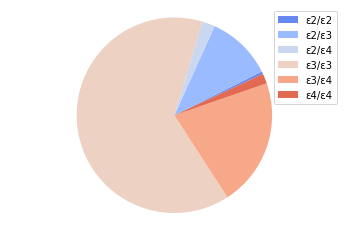

In [57]:
# FEMALE
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# sns.set_palette('Blues')
sns.set_palette('coolwarm')
labels = 'ε2/ε2', 'ε2/ε3', 'ε2/ε4', 'ε3/ε3', 'ε3/ε4', 'ε4/ε4'
sizes = summary_df.F_percent[0:6]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=None, startangle=25)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=labels)

plt.show()
fig = ax1.get_figure()
# fig.savefig('S1_b_legend.png')

In [58]:
df_with_apoe.Model_Health.value_counts()

Norm         1536
Healthy       347
Unhealthy     346
Name: Model_Health, dtype: int64

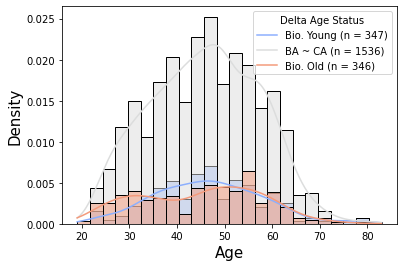

In [59]:
anotherplot = sns.histplot(data=df_with_apoe, x="age", hue="Model_Health", hue_order = ['Unhealthy', 'Norm', 'Healthy'], palette = 'coolwarm_r', stat = 'density', kde=True)#, multiple = 'dodge')
plt.xlabel('Age')
plt.legend(['Bio. Young (n = 347)', 'BA ~ CA (n = 1536)', 'Bio. Old (n = 346)'], title = 'Delta Age Status')
# plt.savefig('S1_c.png', bbox_inches='tight')

In [60]:
# legend for the pie charts was constructed outside of the figure, pie charts were labeled with percentage in ppt, figures were combined in ppt

# Figure S2

In [61]:
df_with_apoe = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/Arivale_preprocessed_interaction_analysis.csv')

In [62]:
###### define delta age groups
df_with_apoe = df_with_apoe.assign(Model_Health2 = 'Not_Filled_Yet')
for i in df_with_apoe.index:
    if df_with_apoe.comb_del_age[i] >= (7.5*365):
        df_with_apoe.Model_Health2[i] = 'Bio. Old'
    elif df_with_apoe.comb_del_age[i] <= -(7.5*365):
        df_with_apoe.Model_Health2[i] = 'Bio. Young'
    else:
        df_with_apoe.Model_Health2[i] = 'BA ~ CA'

/tmp/ipykernel_2712081/1864574362.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.Model_Health2[i] = 'BA ~ CA'
/tmp/ipykernel_2712081/1864574362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.Model_Health2[i] = 'Bio. Old'
/tmp/ipykernel_2712081/1864574362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.Model_Health2[i] = 'Bio. Young'


In [63]:
df_temp = df_with_apoe[(df_with_apoe.sex == 'M')]
pd.crosstab(df_temp.Model_Health2, df_temp.APOE_Status)

APOE_Status,E2,E3,E4,Not Considered
Model_Health2,,,,
BA ~ CA,54,376,114,10
Bio. Old,14,68,41,0
Bio. Young,16,95,37,1


In [64]:
df_temp = df_with_apoe[(df_with_apoe.sex == 'M')]
pd.crosstab(df_temp.Model_Health, df_temp.APOE_Status)

APOE_Status,E2,E3,E4,Not Considered
Model_Health,,,,
Healthy,16,95,37,1
Norm,54,376,114,10
Unhealthy,14,68,41,0


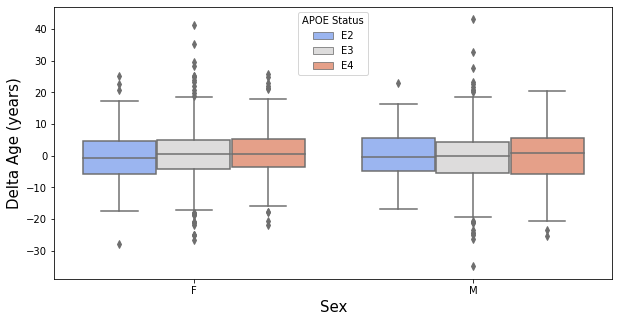

In [65]:
plt.figure(figsize=(10,5))

df_with_apoe['comb_del_age_yrs'] = df_with_apoe['comb_del_age']/365.25
ax = sns.boxplot(data=df_with_apoe,x='sex',y='comb_del_age_yrs',hue='APOE_Status', hue_order=['E2','E3','E4'], palette='coolwarm')

plt.xlabel("Sex")
plt.ylabel("Delta Age (years)")
plt.legend(title='APOE Status', loc='upper center')
# plt.savefig('apoe_delage_box.png', bbox_inches='tight')

In [66]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 50

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [67]:
from scipy.stats import chi2_contingency

In [68]:
df_all=pd.crosstab(df_with_apoe[(df_with_apoe.sex=='F')&(df_with_apoe.APOE_Status !='Not Considered')].APOE_Status,df_with_apoe[(df_with_apoe.sex=='F')&(df_with_apoe.APOE_Status !='Not Considered')].Model_Health)

In [69]:
df_all

Model_Health,Healthy,Norm,Unhealthy
APOE_Status,,,
E2,28,104,26
E3,124,632,136
E4,41,224,54


In [70]:
d = {'APOE E2': [28,104,26], 'APOE E3': [124,632,136], 'APOE E4': [41,224,54]}
i = ['Biologically Younger','|Delta Age| < 7.5 yrs','Biologically Older']
df_all = pd.DataFrame(data=d, index=i)

In [71]:
# defining the table
stat, p, dof, expected = chi2_contingency(df_all)

In [72]:
stat

2.804532257864539

In [73]:
p

0.5910506182978259

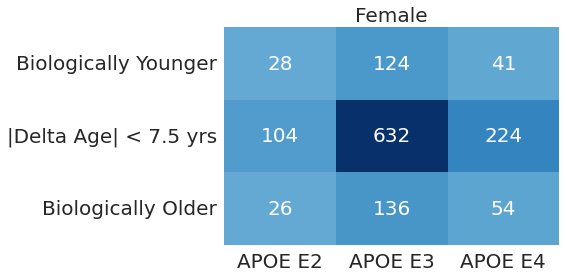

In [74]:
# mask_all = np.zeros_like(df_all)
# mask_all[np.diagonal(mask_all)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(6, 4))
    ax = sns.heatmap(df_all, center=0, cmap="Blues", annot=True, fmt='d',cbar = False)#, square=True)
    plt.title('Female')
    # f.savefig('ExpGrpBrkDwn_Arivale_Female.png', bbox_inches='tight')

In [75]:
df_all=pd.crosstab(df_with_apoe[(df_with_apoe.sex=='M')&(df_with_apoe.APOE_Status !='Not Considered')].APOE_Status,df_with_apoe[(df_with_apoe.sex=='M')&(df_with_apoe.APOE_Status !='Not Considered')].Model_Health)

In [76]:
df_all

Model_Health,Healthy,Norm,Unhealthy
APOE_Status,,,
E2,16,54,14
E3,95,376,68
E4,37,114,41


In [77]:
# defining the table
stat, p, dof, expected = chi2_contingency(df_all)

In [78]:
stat

9.940233152539324

In [79]:
p

0.04144657120542952

In [80]:
d = {'APOE E2': [16,54,14], 'APOE E3': [95,376,68], 'APOE E4': [37,114,41]}
i = ['Biologically Younger','|Delta Age| < 7.5 yrs','Biologically Older']
df_all = pd.DataFrame(data=d, index=i)

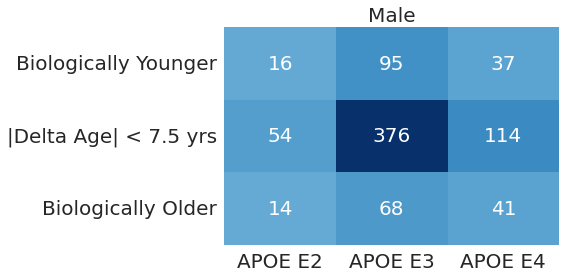

In [81]:
# mask_all = np.zeros_like(df_all)
# mask_all[np.diagonal(mask_all)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(6, 4))
    ax = sns.heatmap(df_all, center=0, cmap="Blues", annot=True, fmt='d',cbar = False)#, square=True)
    plt.title('Male')
    # f.savefig('ExpGrpBrkDwn_Arivale_Male.png', bbox_inches='tight')

In [82]:
# a and b were combined in ppt

# Figure S3

In [83]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [84]:
df_analysis = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/E1199_15122022_2_TwinsUK_Interaction_Analysis.csv')
df_analysis2 = df_analysis[["KeyIndex","Age","Sex","metab_BA"]]

In [85]:
ba_fit_F = df_analysis2[(df_analysis2.Sex == 'F')].copy()
ba_fit_M = df_analysis2[(df_analysis2.Sex == 'M')].copy()

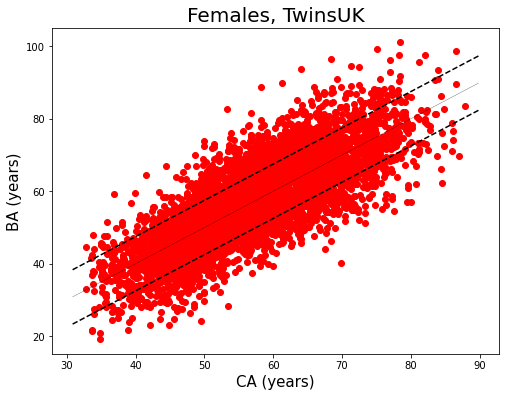

In [86]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(ba_fit_F.Age, ba_fit_F.metab_BA/365.25, c='r', label='New')
ax.plot([ba_fit_F.Age.min()-2.0,ba_fit_F.Age.max()+2.0],[ba_fit_F.Age.min()-2.0,ba_fit_F.Age.max()+2.0],c='k',linestyle='solid',lw=0.25)
ax.plot([ba_fit_F.Age.min()-2.0,ba_fit_F.Age.max()+2.0],[ba_fit_F.Age.min()-2.0+7.5,ba_fit_F.Age.max()+2.0+7.5],c='k',linestyle='dashed')
ax.plot([ba_fit_F.Age.min()-2.0,ba_fit_F.Age.max()+2.0],[ba_fit_F.Age.min()-2.0-7.5,ba_fit_F.Age.max()+2.0-7.5],c='k',linestyle='dashed')

plt.ylabel("BA (years)")
plt.xlabel("CA (years)")
# ax.legend()
plt.title('Females, TwinsUK',fontsize = BIGGER_SIZE)

# fig.savefig('BA_fit_TwinsUK_females.png', bbox_inches='tight')

plt.show()

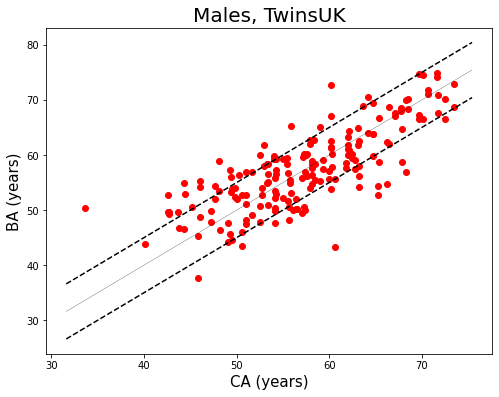

In [87]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(ba_fit_M.Age, ba_fit_M.metab_BA/365.25, c='r', label='New')
ax.plot([ba_fit_M.Age.min()-2.0,ba_fit_M.Age.max()+2.0],[ba_fit_M.Age.min()-2.0,ba_fit_M.Age.max()+2.0],c='k',linestyle='solid',lw=0.25)
ax.plot([ba_fit_M.Age.min()-2.0,ba_fit_M.Age.max()+2.0],[ba_fit_M.Age.min()-2.0+5.0,ba_fit_M.Age.max()+2.0+5.0],c='k',linestyle='dashed')
ax.plot([ba_fit_M.Age.min()-2.0,ba_fit_M.Age.max()+2.0],[ba_fit_M.Age.min()-2.0-5.0,ba_fit_M.Age.max()+2.0-5.0],c='k',linestyle='dashed')

plt.ylabel("BA (years)")
plt.xlabel("CA (years)")
# ax.legend()
plt.title('Males, TwinsUK',fontsize = BIGGER_SIZE)

# fig.savefig('BA_fit_TwinsUK_males.png', bbox_inches='tight')

plt.show()

In [88]:
sp.pearsonr(ba_fit_F.dropna().Age*365.25,ba_fit_F.dropna().metab_BA)[0]

0.7780605390824582

In [89]:
sp.pearsonr(ba_fit_M.dropna().Age*365.25,ba_fit_M.dropna().metab_BA)[0]

0.7764872971705431

In [90]:
df_analysis = df_analysis.sort_values(by='VisitDate').drop_duplicates(subset='PublicID')

In [91]:
df_analysis.Model_Health.value_counts()

BA_equals_CA    1144
Bio_Young        408
Bio_Old          144
Name: Model_Health, dtype: int64

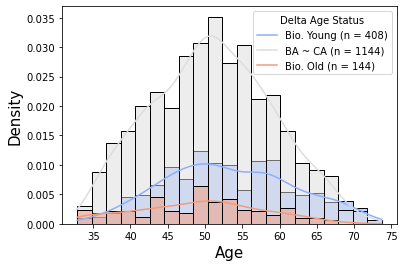

In [92]:
anotherplot = sns.histplot(data=df_analysis, x="Age", hue="Model_Health", hue_order = ['Bio_Old', 'BA_equals_CA', 'Bio_Young'], palette = 'coolwarm_r', stat = 'density', kde=True)#, multiple = 'dodge')
plt.xlabel('Age')
plt.legend(['Bio. Young (n = 408)', 'BA ~ CA (n = 1144)', 'Bio. Old (n = 144)'], title = 'Delta Age Status')
# plt.savefig('S4_c.png', bbox_inches='tight')

In [93]:
# combined and annotated in ppt

# Figure S4

In [94]:
df_full = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/E1199_15122022_2_TwinsUK_Interaction_Analysis.csv').drop(columns=['Unnamed: 0'])

In [95]:
df_analysis_baseline = df_full.drop_duplicates(subset=['PublicID'],keep='first')

In [96]:
df_analysis_baseline = df_analysis_baseline[(df_analysis_baseline.Fasting_Status != 'Not Fasted')]

In [97]:
df_full = df_full[(df_full.Fasting_Status != 'Not Fasted')]

In [98]:
df_full['delta_age_use'] = df_full['metab_deltaAge']/365.25

In [99]:
pd.crosstab(df_full.Sex,df_full.APOE_Status)

APOE_Status,E2,E3,E4,Not Considered
Sex,,,,
F,641,3050,1043,120
M,18,95,69,0


In [100]:
df_full.Age.describe()

count    5036.000000
mean       58.053088
std         9.911074
min        32.850000
25%        50.930000
50%        58.110000
75%        65.120000
max        87.840000
Name: Age, dtype: float64

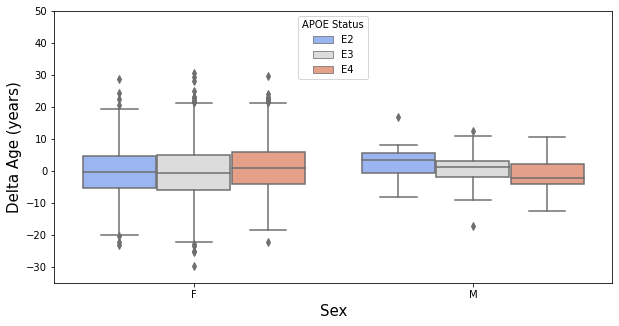

In [101]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=df_full,x='Sex',y='delta_age_use',hue='APOE_Status', hue_order=['E2','E3','E4'], palette='coolwarm')

plt.ylim(-35,50)

plt.xlabel("Sex")
plt.ylabel("Delta Age (years)")
plt.legend(title='APOE Status', loc='upper center')
# plt.savefig('Twins_UK_apoe_delage_box_TwinsUK.png', bbox_inches='tight')

In [102]:
df_full[(df_full.Sex == 'M')&(df_full.APOE_Status == 'E2')].delta_age_use.mean()

2.734838099744977

In [103]:
df_full[(df_full.Sex == 'M')&(df_full.APOE_Status == 'E3')].delta_age_use.mean()

0.5591324906924228

In [104]:
df_full[(df_full.Sex == 'M')&(df_full.APOE_Status == 'E4')].delta_age_use.mean()

-1.2354481470037137

In [105]:
df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E2')].delta_age_use.mean()

-0.09741828368172176

In [106]:
df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E3')].delta_age_use.mean()

-0.37094082428386377

In [107]:
df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E4')].delta_age_use.mean()

1.0683142019266005

In [108]:
sp.mannwhitneyu((df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E2')].delta_age_use),
                (df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E4')].delta_age_use))

MannwhitneyuResult(statistic=303847.0, pvalue=0.0016832795782001169)

In [109]:
sp.mannwhitneyu((df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E2')].delta_age_use),
                (df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E3')].delta_age_use.dropna()))

MannwhitneyuResult(statistic=993166.0, pvalue=0.5065266029864304)

In [110]:
sp.mannwhitneyu((df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E4')].delta_age_use),
                (df_full[(df_full.Sex == 'F')&(df_full.APOE_Status == 'E3')].delta_age_use.dropna()))

MannwhitneyuResult(statistic=1756122.0, pvalue=4.200184312620805e-07)

In [111]:
sp.mannwhitneyu((df_full[(df_full.Sex == 'M')&(df_full.APOE_Status == 'E2')].delta_age_use),
                (df_full[(df_full.Sex == 'M')&(df_full.APOE_Status == 'E4')].delta_age_use))

MannwhitneyuResult(statistic=876.0, pvalue=0.007659705504316683)

In [112]:
sp.mannwhitneyu((df_full[(df_full.Sex == 'M')&(df_full.APOE_Status == 'E4')].delta_age_use),
                (df_full[(df_full.Sex == 'M')&(df_full.APOE_Status == 'E3')].delta_age_use.dropna()))

MannwhitneyuResult(statistic=2509.0, pvalue=0.010523511697925637)

In [113]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 50

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [114]:
pd.crosstab(df_analysis_baseline[(df_analysis_baseline.Sex == 'M')].APOE_Status,df_analysis_baseline[(df_analysis_baseline.Sex == 'M')].Model_Health)

Model_Health,BA_equals_CA,Bio_Old,Bio_Young
APOE_Status,,,
E2,2,3,1
E3,21,10,1
E4,16,4,3


In [115]:
d = {'APOE E2': [1,2,3], 'APOE E3': [1,21,10], 'APOE E4': [3,16,4]}
i = ['Biologically Younger','|Delta Age| < 5.0 yrs','Biologically Older']
df_all = pd.DataFrame(data=d, index=i)

In [116]:
from scipy.stats import chi2_contingency

In [117]:
# defining the table
stat, p, dof, expected = chi2_contingency(df_all)

In [118]:
stat

5.287413382298293

In [119]:
p

0.25905750733302924

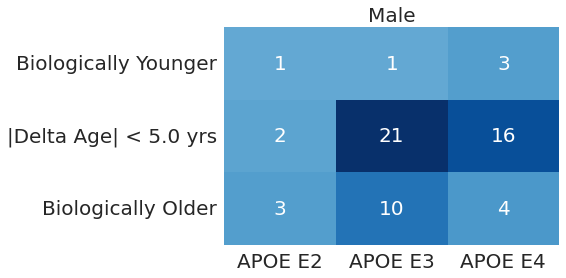

In [120]:
# mask_all = np.zeros_like(df_all)
# mask_all[np.diagonal(mask_all)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(6, 4))
    ax = sns.heatmap(df_all, center=0, cmap="Blues", annot=True, fmt='d',cbar = False)#, square=True)
    plt.title('Male')
    # f.savefig('ExpGrpBrkDwn_TwinsUK_males_indiv.png', bbox_inches='tight')

In [121]:
pd.crosstab(df_analysis_baseline[(df_analysis_baseline.Sex == 'F')].APOE_Status,df_analysis_baseline[(df_analysis_baseline.Sex == 'F')].Model_Health)

Model_Health,BA_equals_CA,Bio_Old,Bio_Young
APOE_Status,,,
E2,143,20,52
E3,697,68,266
E4,234,38,77
Not Considered,31,1,8


In [122]:
d = {'APOE E2': [52,143,20], 'APOE E3': [266,697,68], 'APOE E4': [77,234,38]}
i = ['Biologically Younger','|Delta Age| < 7.5 yrs','Biologically Older']
df_all = pd.DataFrame(data=d, index=i)

In [123]:
from scipy.stats import chi2_contingency

In [124]:
# defining the table
stat, p, dof, expected = chi2_contingency(df_all)

In [125]:
stat

8.242120312395626

In [126]:
p

0.08310098892059788

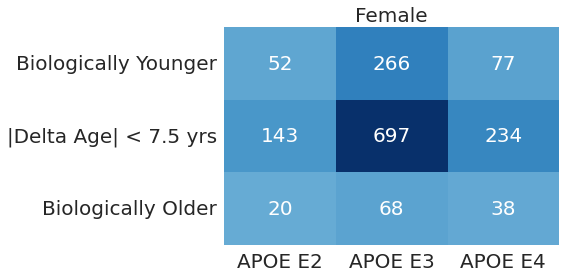

In [127]:
# mask_all = np.zeros_like(df_all)
# mask_all[np.diagonal(mask_all)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(6, 4))
    ax = sns.heatmap(df_all, center=0, cmap="Blues", annot=True, fmt='d',cbar = False)#, square=True)
    plt.title('Female')
    # f.savefig('ExpGrpBrkDwn_TwinsUK_females_indiv.png', bbox_inches='tight')

In [128]:
# combined and annotated in ppt

# Figure S5

In [129]:
df_5SD_winsor_arivale = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/Arivale_preprocessed_interaction_analysis.csv').drop(columns=['Unnamed: 0'])

In [130]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [131]:
# rename delta age statuses
df_5SD_winsor_arivale['Delta Age Status'] = 'Not_Filled_Yet'
for i in df_5SD_winsor_arivale.index:
    if df_5SD_winsor_arivale.Model_Health[i] == "Unhealthy":
        df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Old'
    elif df_5SD_winsor_arivale.Model_Health[i] == "Healthy":
        df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Young'
    elif df_5SD_winsor_arivale.Model_Health[i] == "Norm":
        df_5SD_winsor_arivale['Delta Age Status'][i] = 'BA ~ CA'

/tmp/ipykernel_2712081/1563605972.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5SD_winsor_arivale['Delta Age Status'][i] = 'BA ~ CA'
/tmp/ipykernel_2712081/1563605972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Old'
/tmp/ipykernel_2712081/1563605972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5SD_winsor_arivale['Delta Age Status'][i] = 'Bio. Young'


In [132]:
def grab_alleles(df_with_apoe):
    df_with_apoe['e2_allele'] = 999
    df_with_apoe['e4_allele'] = 999
    for i in df_with_apoe.index:
        if df_with_apoe.APOE_Genotype[i] == 'E2/E2':
            df_with_apoe.e2_allele[i] = 2
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E2/E3':
            df_with_apoe.e2_allele[i] = 1
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E2/E4':
            df_with_apoe.e2_allele[i] = 1
            df_with_apoe.e4_allele[i] = 1
        if df_with_apoe.APOE_Genotype[i] == 'E3/E3':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E3/E4':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 1
        if df_with_apoe.APOE_Genotype[i] == 'E4/E4':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 2
    return df_with_apoe

In [133]:
df_5SD_winsor_arivale = grab_alleles(df_5SD_winsor_arivale)

/tmp/ipykernel_2712081/3204699222.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e2_allele[i] = 0
/tmp/ipykernel_2712081/3204699222.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e4_allele[i] = 1
/tmp/ipykernel_2712081/3204699222.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e2_allele[i] = 0
/tmp/ipykernel_2712081/3204699222.py:16: SettingWithCopyWarning: 
A value is trying to b

In [134]:
def delta_age_decade(df_with_apoe):
    df_with_apoe['deltaage_decade'] = '999'
    for i in df_with_apoe.index:
        if df_with_apoe.comb_del_age[i]/365.25 <= -10:
            df_with_apoe.deltaage_decade[i] = "< -10"
        elif (df_with_apoe.comb_del_age[i]/365.25 <= -5) & (df_with_apoe.comb_del_age[i]/365.25 > -10):
            df_with_apoe.deltaage_decade[i] = "-10 to -5"
        elif (df_with_apoe.comb_del_age[i]/365.25 <= 0) & (df_with_apoe.comb_del_age[i]/365.25 > -5):
            df_with_apoe.deltaage_decade[i] = "-5 to 0"
        elif (df_with_apoe.comb_del_age[i]/365.25 <= 5) & (df_with_apoe.comb_del_age[i]/365.25 > 0):
            df_with_apoe.deltaage_decade[i] = "0 to 5"
        elif (df_with_apoe.comb_del_age[i]/365.25 <= 10) & (df_with_apoe.comb_del_age[i]/365.25 > 5):
            df_with_apoe.deltaage_decade[i] = "5 to 10"
        elif df_with_apoe.comb_del_age[i]/365.25 > 10:
            df_with_apoe.deltaage_decade[i] = "> 10"
            
    return df_with_apoe

In [135]:
df_5SD_winsor_arivale = delta_age_decade(df_5SD_winsor_arivale)

/tmp/ipykernel_2712081/2970007208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.deltaage_decade[i] = "-5 to 0"
/tmp/ipykernel_2712081/2970007208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.deltaage_decade[i] = "5 to 10"
/tmp/ipykernel_2712081/2970007208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.deltaage_decade[i] = "-10 to -5"
/tmp/ipykernel_2712081/2970007208.py:11: Setti

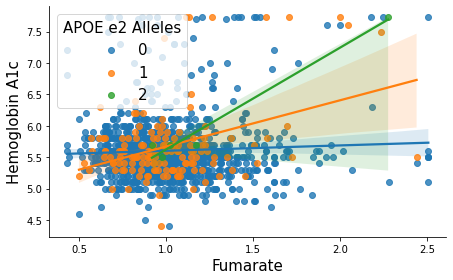

In [136]:
ax = sns.lmplot(data=df_5SD_winsor_arivale[(df_5SD_winsor_arivale.e2_allele < 3)],
                x='330',y='GLYCOHEMOGLOBIN A1C',hue='e2_allele', legend=False, height = 4, aspect = 1.6, palette = 'tab10')

plt.xlabel('Fumarate')
plt.ylabel('Hemoglobin A1c')
plt.legend(title='APOE e2 Alleles', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240728_Fig_S5_1of6.png', bbox_inches='tight')

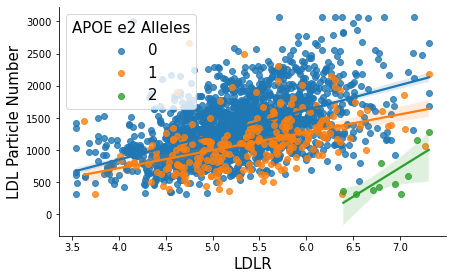

In [137]:
ax = sns.lmplot(data=df_5SD_winsor_arivale[(df_5SD_winsor_arivale.e2_allele < 3)],
                x='CVD3_P01130',y='LDL PARTICLE NUMBER',hue='e2_allele', legend=False, height = 4, aspect = 1.6, palette = 'tab10')

plt.xlabel('LDLR')
plt.ylabel('LDL Particle Number')
plt.legend(title='APOE e2 Alleles', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240728_Fig_S5_2of6.png', bbox_inches='tight')

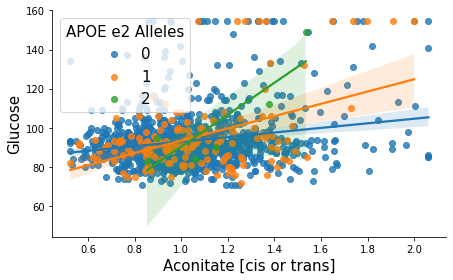

In [138]:
ax = sns.lmplot(data=df_5SD_winsor_arivale[(df_5SD_winsor_arivale.e2_allele < 3)],
                x='100001359',y='GLUCOSE',hue='e2_allele', legend=False, height = 4, aspect = 1.6, palette = 'tab10')

plt.xlabel('Aconitate [cis or trans]')
plt.ylabel('Glucose')
plt.legend(title='APOE e2 Alleles', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240728_Fig_S5_3of6.png', bbox_inches='tight')

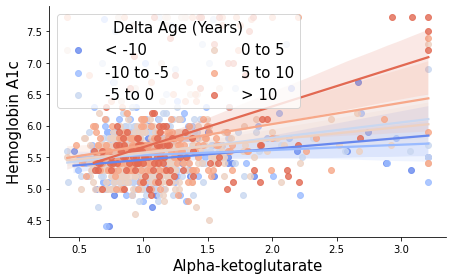

In [139]:
ax = sns.lmplot(data=df_5SD_winsor_arivale,
                x='93',y='GLYCOHEMOGLOBIN A1C',
                hue='deltaage_decade', hue_order = ["< -10", "-10 to -5", "-5 to 0", "0 to 5", "5 to 10", "> 10"],
                legend=False, height = 4, aspect = 1.6, palette = 'coolwarm')

plt.xlabel('Alpha-ketoglutarate')
plt.ylabel('Hemoglobin A1c')
plt.legend(ncol=2, title='Delta Age (Years)', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240728_Fig_S5_4of6.png', bbox_inches='tight')

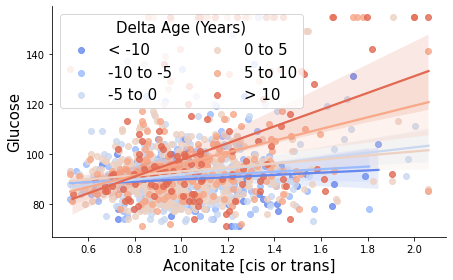

In [140]:
ax = sns.lmplot(data=df_5SD_winsor_arivale,
                x='100001359',y='GLUCOSE',
                hue='deltaage_decade', hue_order = ["< -10", "-10 to -5", "-5 to 0", "0 to 5", "5 to 10", "> 10"],
                legend=False, height = 4, aspect = 1.6, palette = 'coolwarm')

plt.xlabel('Aconitate [cis or trans]')
plt.ylabel('Glucose')
plt.legend(ncol=2, title='Delta Age (Years)', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240728_Fig_S5_5of6.png', bbox_inches='tight')

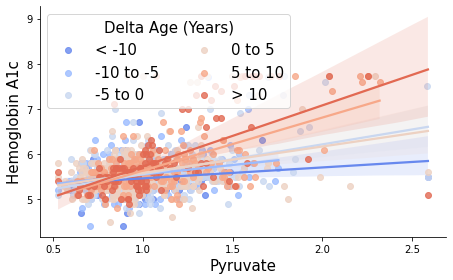

In [141]:
ax = sns.lmplot(data=df_5SD_winsor_arivale,
                x='823',y='GLYCOHEMOGLOBIN A1C',
                hue='deltaage_decade', hue_order = ["< -10", "-10 to -5", "-5 to 0", "0 to 5", "5 to 10", "> 10"],
                legend=False, height = 4, aspect = 1.6, palette = 'coolwarm')

plt.xlabel('Pyruvate')
plt.ylabel('Hemoglobin A1c')
plt.legend(ncol=2, title='Delta Age (Years)', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240728_Fig_S5_6of6.png', bbox_inches='tight')

# Figure S6

In [142]:
df_analysis_5SD_valid = pd.read_csv('/notebooks/0. APOE-Multiomics/Data_Files/E1199_15122022_2_TwinsUK_Interaction_Analysis.csv').drop(columns=['Unnamed: 0'])

In [143]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [144]:
###### define delta age groups
df_analysis_5SD_valid['Delta Age Status Sex'] = 'Not_Filled_Yet'
df_analysis_5SD_valid['APOE Status Sex'] = 'Not_Filled_Yet'

for i in df_analysis_5SD_valid.index:       
    if (df_analysis_5SD_valid.Sex[i] == "M"):
        if (df_analysis_5SD_valid.Model_Health[i] == "Bio_Old"):
            df_analysis_5SD_valid['Delta Age Status Sex'][i] = 'Bio. Old Male'
        elif (df_analysis_5SD_valid.Model_Health[i] == "Bio_Young"):
            df_analysis_5SD_valid['Delta Age Status Sex'][i] = 'Bio. Young Male'
        elif (df_analysis_5SD_valid.Model_Health[i] == "BA_equals_CA"):
            df_analysis_5SD_valid['Delta Age Status Sex'][i] = 'BA~CA Male'
            
        if (df_analysis_5SD_valid.APOE_Status[i] == "E2"):
            df_analysis_5SD_valid['APOE Status Sex'][i] = 'Male APOE E2'
        elif (df_analysis_5SD_valid.APOE_Status[i] == "E3"):
            df_analysis_5SD_valid['APOE Status Sex'][i] = 'Male APOE E3'
        elif (df_analysis_5SD_valid.APOE_Status[i] == "E4"):
            df_analysis_5SD_valid['APOE Status Sex'][i] = 'Male APOE E4'
    
    elif (df_analysis_5SD_valid.Sex[i] == "F"):
        if (df_analysis_5SD_valid.Model_Health[i] == "Bio_Old"):
            df_analysis_5SD_valid['Delta Age Status Sex'][i] = 'Bio. Old Female'
        elif (df_analysis_5SD_valid.Model_Health[i] == "Bio_Young"):
            df_analysis_5SD_valid['Delta Age Status Sex'][i] = 'Bio. Young Female'
        elif (df_analysis_5SD_valid.Model_Health[i] == "BA_equals_CA"):
            df_analysis_5SD_valid['Delta Age Status Sex'][i] = 'BA~CA Female'
            
        if (df_analysis_5SD_valid.APOE_Status[i] == "E2"):
            df_analysis_5SD_valid['APOE Status Sex'][i] = 'Female APOE E2'
        elif (df_analysis_5SD_valid.APOE_Status[i] == "E3"):
            df_analysis_5SD_valid['APOE Status Sex'][i] = 'Female APOE E3'
        elif (df_analysis_5SD_valid.APOE_Status[i] == "E4"):
            df_analysis_5SD_valid['APOE Status Sex'][i] = 'Female APOE E4'

/tmp/ipykernel_2712081/3234759209.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_5SD_valid['Delta Age Status Sex'][i] = 'BA~CA Female'
/tmp/ipykernel_2712081/3234759209.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_5SD_valid['APOE Status Sex'][i] = 'Female APOE E3'
/tmp/ipykernel_2712081/3234759209.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_5SD_valid['APOE Status Sex'][i] = 'Fe

In [145]:
def grab_alleles(df_with_apoe):
    df_with_apoe['e2_allele'] = 999
    df_with_apoe['e4_allele'] = 999
    for i in df_with_apoe.index:
        if df_with_apoe.APOE_Genotype[i] == 'E2/E2':
            df_with_apoe.e2_allele[i] = 2
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E2/E3':
            df_with_apoe.e2_allele[i] = 1
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E2/E4':
            df_with_apoe.e2_allele[i] = 1
            df_with_apoe.e4_allele[i] = 1
        if df_with_apoe.APOE_Genotype[i] == 'E3/E3':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 0
        if df_with_apoe.APOE_Genotype[i] == 'E3/E4':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 1
        if df_with_apoe.APOE_Genotype[i] == 'E4/E4':
            df_with_apoe.e2_allele[i] = 0
            df_with_apoe.e4_allele[i] = 2
    return df_with_apoe

In [146]:
df_analysis_5SD_valid = grab_alleles(df_analysis_5SD_valid)

/tmp/ipykernel_2712081/3204699222.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e2_allele[i] = 0
/tmp/ipykernel_2712081/3204699222.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e4_allele[i] = 0
/tmp/ipykernel_2712081/3204699222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apoe.e2_allele[i] = 1
/tmp/ipykernel_2712081/3204699222.py:10: SettingWithCopyWarning: 
A value is trying to be

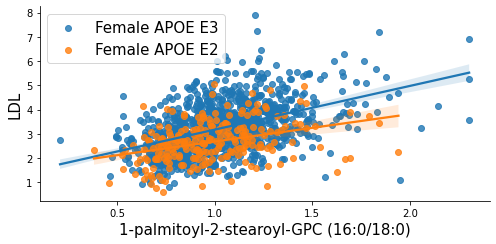

In [147]:
ax = sns.lmplot(data=df_analysis_5SD_valid[((df_analysis_5SD_valid['APOE_Status'] == 'E2')|(df_analysis_5SD_valid['APOE_Status'] == 'E3'))&(df_analysis_5SD_valid.Sex == 'F')],
                x='1-palmitoyl-2-stearoyl-GPC (16:0/18:0)',y='LDL',hue='APOE Status Sex', hue_order = ['Female APOE E3', 'Female APOE E2'],
                legend=False, height = 3.5, aspect = 2, palette = 'tab10')

plt.xlabel('1-palmitoyl-2-stearoyl-GPC (16:0/18:0)')
plt.ylabel('LDL')
plt.legend(loc='upper left')#, labels = ["BA~CA Female","Bio. Young Female"])
           
# plt.savefig('240810_Fig_S6_1of6.png', bbox_inches='tight')

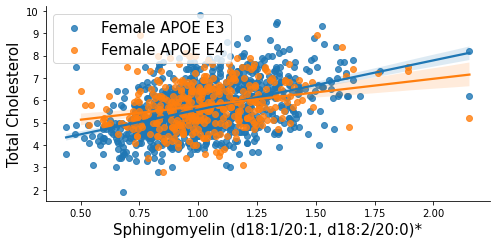

In [148]:
ax = sns.lmplot(data=df_analysis_5SD_valid[((df_analysis_5SD_valid['APOE_Status'] == 'E4')|(df_analysis_5SD_valid['APOE_Status'] == 'E3'))&(df_analysis_5SD_valid.Sex == 'F')],
                x='sphingomyelin (d18:1/20:1, d18:2/20:0)*',y='Tot-cholesterol',hue='APOE Status Sex', hue_order = ['Female APOE E3', 'Female APOE E4'],
                legend=False, height = 3.5, aspect = 2, palette = 'tab10')

plt.xlabel('Sphingomyelin (d18:1/20:1, d18:2/20:0)*')
plt.ylabel('Total Cholesterol')
plt.legend(loc='upper left')#, labels = ["BA~CA Female","Bio. Young Female"])
           
# plt.savefig('240810_Fig_S6_2of6.png', bbox_inches='tight')

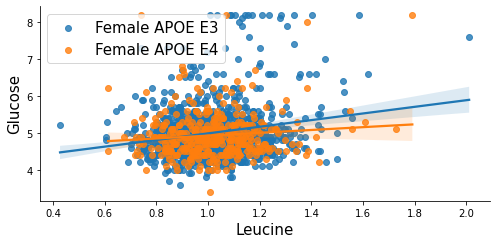

In [149]:
ax = sns.lmplot(data=df_analysis_5SD_valid[((df_analysis_5SD_valid['APOE_Status'] == 'E4')|(df_analysis_5SD_valid['APOE_Status'] == 'E3'))&(df_analysis_5SD_valid.Sex == 'F')],
                x='leucine',y='Glucose',hue='APOE Status Sex', hue_order = ['Female APOE E3', 'Female APOE E4'],
                legend=False, height = 3.5, aspect = 2, palette = 'tab10')

plt.xlabel('Leucine')
plt.ylabel('Glucose')
plt.legend(loc='upper left')#, labels = ["BA~CA Female","Bio. Young Female"])
           
# plt.savefig('240810_Fig_S6_3of6.png', bbox_inches='tight')

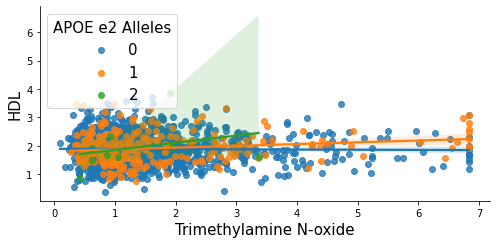

In [150]:
ax = sns.lmplot(data=df_analysis_5SD_valid[(df_analysis_5SD_valid.e2_allele < 3)],
                x='trimethylamine N-oxide',y='HDL',hue='e2_allele', legend=False, height = 3.5, aspect = 2, palette = 'tab10')

plt.xlabel('Trimethylamine N-oxide')
plt.ylabel('HDL')
plt.legend(title='APOE e2 Alleles', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240810_Fig_S6_4of6.png', bbox_inches='tight')

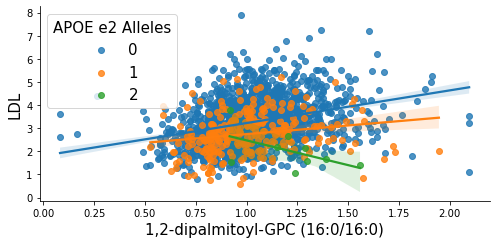

In [151]:
ax = sns.lmplot(data=df_analysis_5SD_valid[(df_analysis_5SD_valid.e2_allele < 3)],
                x='1,2-dipalmitoyl-GPC (16:0/16:0)',y='LDL',hue='e2_allele', legend=False, height = 3.5, aspect = 2, palette = 'tab10')

plt.xlabel('1,2-dipalmitoyl-GPC (16:0/16:0)')
plt.ylabel('LDL')
plt.legend(title='APOE e2 Alleles', title_fontsize = 15, loc='upper left')
           
# plt.savefig('240810_Fig_S6_5of6.png', bbox_inches='tight')

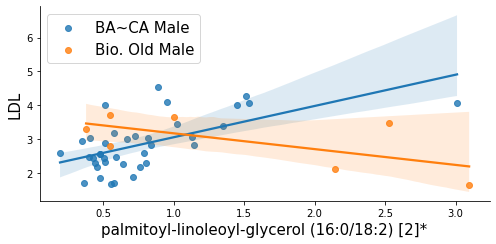

In [152]:
ax = sns.lmplot(data=df_analysis_5SD_valid[((df_analysis_5SD_valid['Delta Age Status Sex'] == 'Bio. Old Male')|(df_analysis_5SD_valid['Delta Age Status Sex'] == 'BA~CA Male'))&(df_analysis_5SD_valid.Sex == 'M')],
                x='palmitoyl-linoleoyl-glycerol (16:0/18:2) [2]*',y='LDL',hue='Delta Age Status Sex',# hue_order = ['Female APOE E3', 'Female APOE E4'],
                legend=False, height = 3.5, aspect = 2, palette = 'tab10')

plt.xlabel('palmitoyl-linoleoyl-glycerol (16:0/18:2) [2]*')
plt.ylabel('LDL')
plt.legend(loc='upper left')#, labels = ["BA~CA Female","Bio. Young Female"])

# plt.savefig('240810_Fig_S6_6of6.png', bbox_inches='tight')